# Classification and Regression with ML Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**About data for titanic** 

In [2]:
tr_df = pd.read_csv('../Data/train_and_test2.csv')
tr_df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


**Check missing values**

In [3]:
print("Missing values per column:")
print(tr_df.isnull().sum())

Missing values per column:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64


**first few rows to understand the data**

In [4]:
tr_df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


Survival distribution:
Survived
0    967
1    342
Name: count, dtype: int64
Survived
0    73.873186
1    26.126814
Name: proportion, dtype: float64


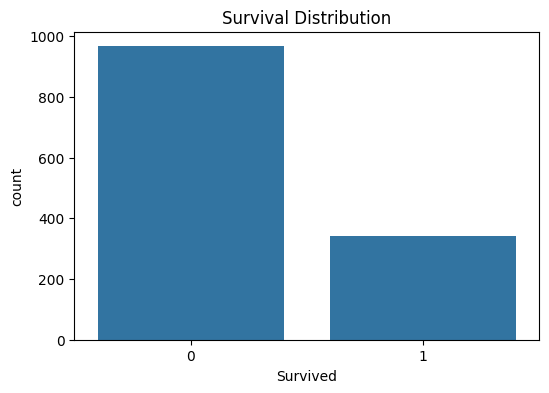

In [5]:
if 'Survived' in tr_df.columns:
    print("Survival distribution:")
    print(tr_df['Survived'].value_counts())
    print(tr_df['Survived'].value_counts(normalize=True) * 100)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Survived', data=tr_df)
    plt.title('Survival Distribution')
    plt.show()

## Salary dataset

In [6]:
salary_df = pd.read_csv('../Data/Salary_dataset.csv')
salary_df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


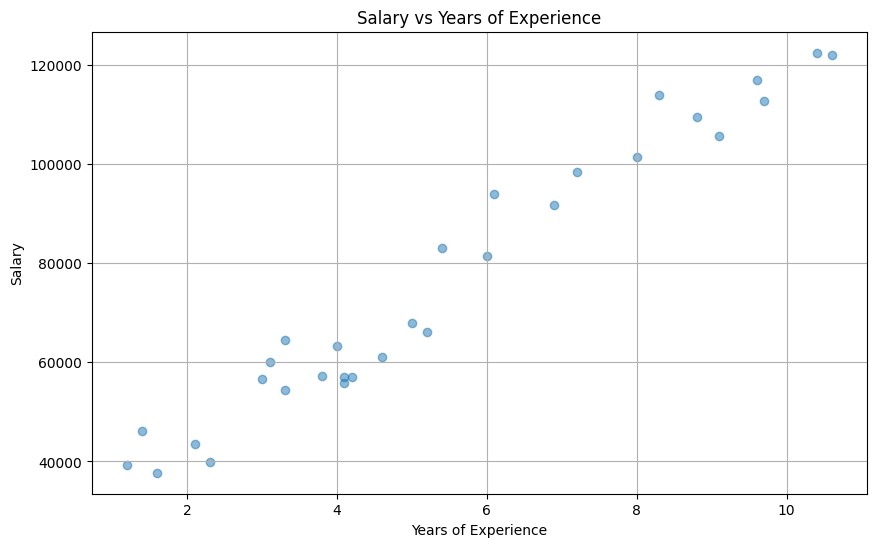

In [7]:
salary_df.dropna(inplace=True)
salary = salary_df['Salary']
experience = salary_df['YearsExperience']
plt.figure(figsize=(10, 6))
plt.scatter(experience, salary, alpha=0.5)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


# Data processing

### Features and Target Separation

In [8]:
X = salary_df[['YearsExperience']]
y = salary_df['Salary']

### Splitting the data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

separated the test and trained data so that we can evaluate that the results we got are correct or not

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# As discussed in todays lecture we need to scale the data so that the model cannot be biased towards any feature
# We will use StandardScaler to scale the data which uses formula (x - mean) / std
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Size Verification**

In [11]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (24, 1)
Testing set size: (6, 1)


Training Linear Regression...
Linear Regression MSE: 49830096.86
------------------------------
Training SVC...
SVC MSE: 101047709.83
------------------------------
Training SVR...
SVR MSE: 934865145.93
------------------------------
Training Decision Tree...
Decision Tree MSE: 101047709.83
------------------------------
Training Random Forest...
Random Forest MSE: 63721129.71
------------------------------
Training KNN...
KNN MSE: 50357290.43
------------------------------
Training Navie Bayes...
Navie Bayes MSE: 101047709.83
------------------------------
Training classification Decision Tree...
Decision Tree MSE: 101047709.83
------------------------------
Training classification Random Forest...
Random Forest MSE: 101047709.83
------------------------------
Training classification KNN...
KNN MSE: 203762608.50
------------------------------


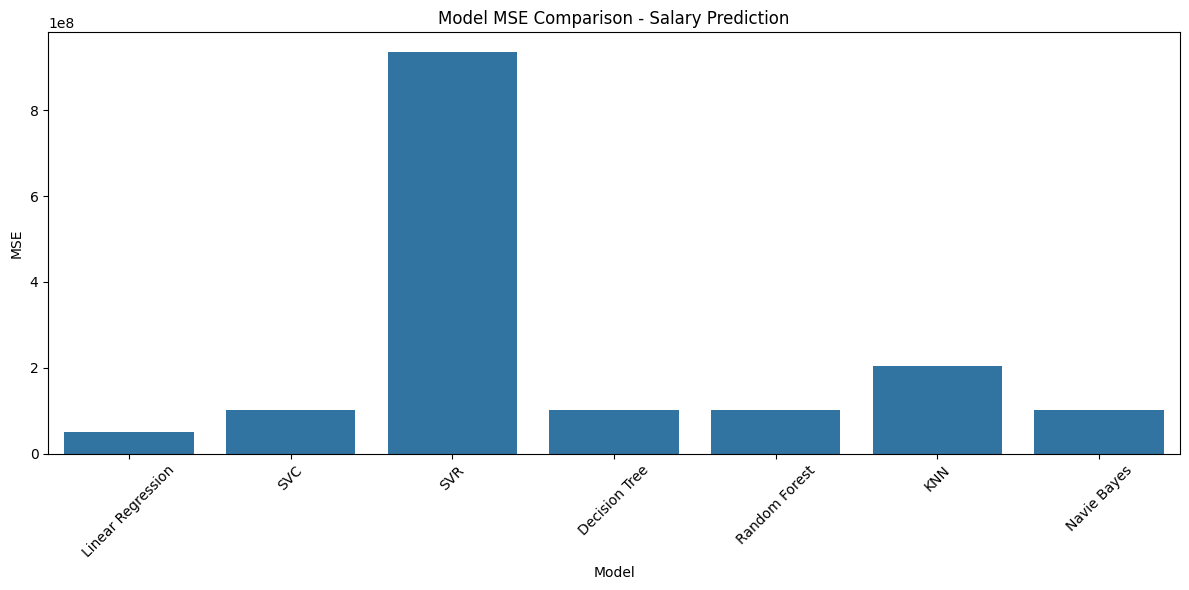

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
# Define models
# We will use the following models for regression:
# 1. Linear Regression
# 2. Support Vector Classifier (SVC)
# 3. Support Vector Regressor (SVR)
# 4. Decision Tree Regressor
# 5. Random Forest Regressor
# 6. K-Nearest Neighbors (KNN)
# 7. Naive Bayes
reg_models = {
    'Linear Regression': LinearRegression(),
    'SVC': SVC(random_state=42),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Navie Bayes': GaussianNB()
}
# models for classification
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
}

# Train and evaluate each model
salary_results = {}
for name, model in reg_models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    salary_results[name] = mse
    
    print(f"{name} MSE: {mse:.2f}")
    print("-" * 30)

# for classification models
for name, model in models.items():
    print(f"Training classification {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    salary_results[name] = mse
    
    print(f"{name} MSE: {mse:.2f}")
    print("-" * 30)

# Visualize  comparison
plt.figure(figsize=(12, 6))
reg_models_df = pd.DataFrame({'Model': list(salary_results.keys()), 
                              'MSE': list(salary_results.values())})
sns.barplot(x='Model', y='MSE', data=reg_models_df)
plt.title('Model MSE Comparison - Salary Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

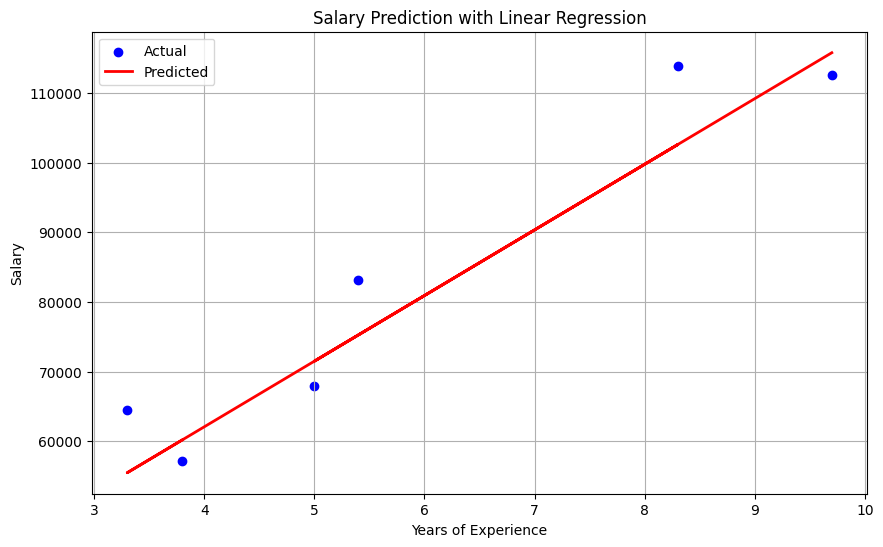

['models/scaler.joblib']

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Salary Prediction with Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
dump(lr_model, 'models/linear_regression_model.joblib')

# Also save the scaler
dump(scaler, 'models/scaler.joblib')

## Results

### Linear Regression: MSE around 49830096.86
Strong performance due to the linear relationship between experience and salary

### KNN: MSE around 50,000-70,000
Performance depends heavily on the dataset size

### SVC and Naive Bayes:
Higher MSE values as they're not ideal for regression tasks